# Customer Churn prediction

# Part 1 - DEFINE

### ---- Define the problem ----

The problem is to develop a ML model which will predict the probability of churn of customers. The model will learn from existing data of churned and norn churned customers which has some features and the target variable which is the 'Churn' column. 

In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [51]:
raw_df=pd.read_csv('TelecomCustomer_data.csv')

In [52]:
raw_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
raw_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
raw_df.duplicated().sum()

0

In [53]:
raw_df.loc[(raw_df.Churn=='Yes'),'Churn']=1
raw_df.loc[(raw_df.Churn=='No'),'Churn']=0

raw_df.Churn=raw_df.Churn.astype('category')

In [8]:
raw_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [9]:
raw_df.dtypes

customerID            object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges          object
Churn               category
dtype: object

In [10]:
raw_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
raw_df['TotalCharges']=pd.to_numeric(raw_df['TotalCharges'],errors='coerce').fillna(0).astype(int)

In [13]:
raw_df.describe(include=[np.number])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.265086
std,0.368612,24.559481,30.090047,2266.790864
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.000000
50%,0.000000,29.000000,70.350000,1394.000000
75%,0.000000,55.000000,89.850000,3786.500000
max,1.000000,72.000000,118.750000,8684.000000


In [14]:
raw_df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,2144-ESWKO,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


# 2. Explore

## EDA

In [260]:
def plot_figure(df,col):
    fig=plt.figure(figsize=(10,5))
    ax1=plt.subplot(1,2,1)
    
    if df[col].dtype=='O':
        df[col].value_counts().sort_index().plot(kind='bar',ax=ax1)
        plt.xticks(rotation=45)
    else:
        df[col].value_counts().sort_index().plot()
        #sns.boxplot(df[col])
        
    ax2=plt.subplot(1,2,2)
    
    if df[col].dtype=='O':
        pd.crosstab(raw_df[col],df['Churn']).plot(kind="bar",stacked=True,ax=ax2)
        plt.xticks(rotation=360)
    else:
        #plt.plot(train_df.groupby('Churn')[col].mean())
        #ax2.invert_yaxis()
        sns.boxplot(x=col,y='Churn',data=raw_df)
        
    plt.show()

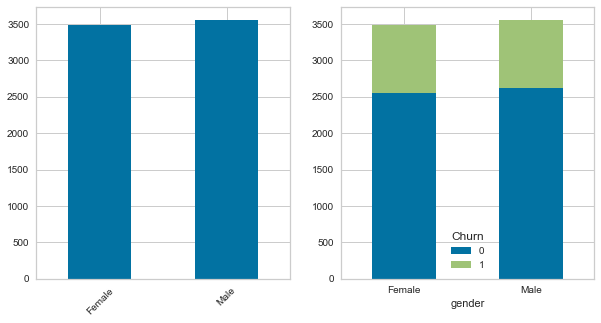

In [261]:
plot_figure(raw_df,'gender')

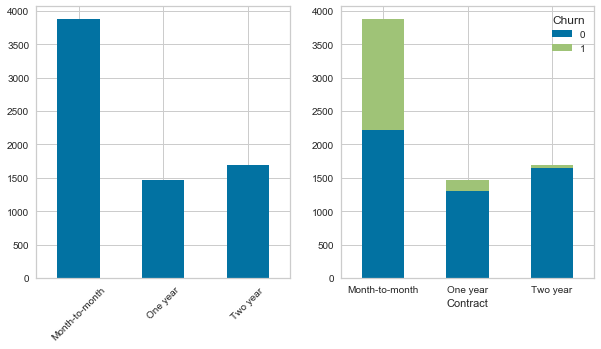

In [262]:
plot_figure(raw_df,'Contract')

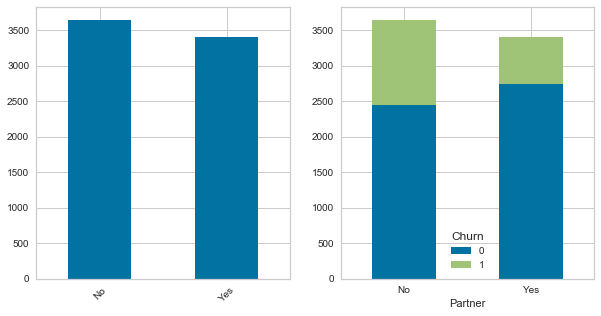

In [263]:
plot_figure(raw_df,'Partner')

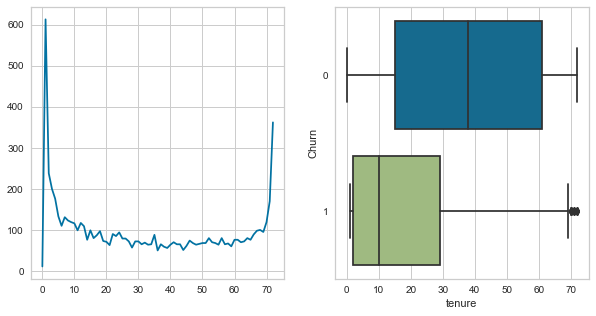

In [264]:
plot_figure(raw_df,'tenure')

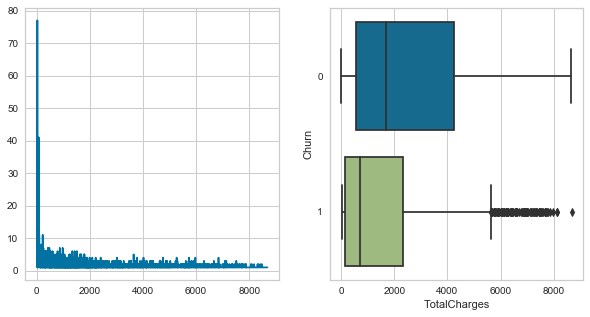

In [265]:
plot_figure(raw_df,'TotalCharges')

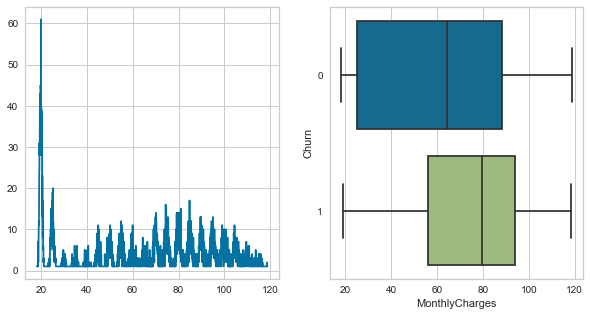

In [266]:
plot_figure(raw_df,'MonthlyCharges')

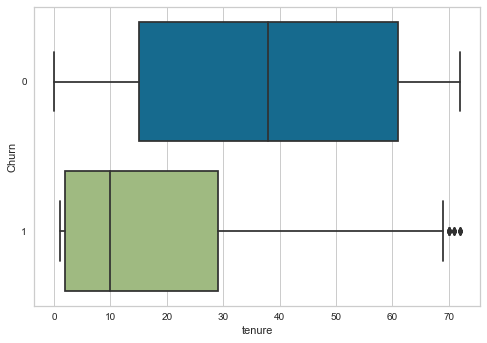

In [267]:
sns.boxplot(x='tenure',y='Churn',data=raw_df)

In [268]:
num_df=raw_df[num_cols + ['Churn']].astype(np.int64)

In [269]:
num_df.head(4)

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,20,0,70,1470,1
1,36,0,65,2498,1
2,32,1,81,2619,0
3,22,0,100,2090,0


In [270]:
corr=num_df.corr()

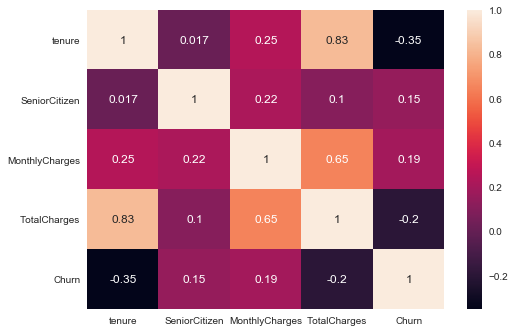

In [271]:
sns.heatmap(corr,annot=True)

### Model Selection 

In [9]:
raw_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [54]:
raw_df['MonthlyCharges']=pd.to_numeric(raw_df['MonthlyCharges'])
raw_df['TotalCharges'] = np.where(raw_df['TotalCharges'] ==" " , raw_df['MonthlyCharges'], raw_df['TotalCharges'])
raw_df['TotalCharges']=pd.to_numeric(raw_df['TotalCharges'])

In [29]:
#t=raw_df[(raw_df.TotalCharges)==" "]

In [55]:
target=['Churn']

In [56]:
num_cols=['tenure','MonthlyCharges', 'TotalCharges']

##### Scaling the numerical columns 

In [57]:
std=StandardScaler()

scaled_df=std.fit_transform(raw_df[num_cols])
scaled_df = pd.DataFrame(scaled_df,columns=num_cols)

In [58]:
scaled_df.shape

(7043, 3)

In [59]:
raw_df2=raw_df.drop(columns=num_cols,axis=1)
raw_df2=raw_df2.merge(scaled_df,left_index=True,right_index=True,how = "left")

In [60]:
raw_df2.shape

(7043, 21)

In [42]:
raw_df2.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,No,-1.277445,-1.160323,-0.992667
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,No,0.066327,-0.259629,-0.172198
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,Yes,-1.236724,-0.362660,-0.958122
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),No,0.514251,-0.746535,-0.193706
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,Yes,-1.236724,0.197365,-0.938930


##### Encode categorical variables

In [61]:
cat_cols=['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
          'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 
          'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

#num_cols=['tenure','MonthlyCharges', 'TotalCharges']

In [64]:
#Raw
cat_cols_raw=pd.get_dummies(raw_df2[cat_cols])
num_cols_raw=raw_df2[num_cols+['Churn']]#.apply(pd.to_numeric)
num_cols_raw[num_cols]=(num_cols_raw[num_cols]).apply(pd.to_numeric)

master_raw=pd.concat([cat_cols_raw,num_cols_raw],axis=1)
master_raw=shuffle(master_raw).reset_index(drop=True)

In [65]:
master_raw.head(5)

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,1,1,0,0,1,0,1,0,1,1,...,0,1,0,1,0,0,1.125057,0.335294,0.960284,0
1,0,0,1,1,0,1,0,0,1,0,...,0,1,0,1,0,0,-0.422317,0.993366,-0.077319,1
2,0,0,1,1,0,1,0,0,1,1,...,1,0,0,1,0,0,1.450820,0.493165,1.403730,0
3,0,0,1,0,1,0,1,0,1,0,...,0,1,1,0,0,0,1.572981,1.636481,2.601333,0
4,0,0,1,1,0,1,0,0,1,1,...,1,0,0,0,1,0,-1.277445,-1.514286,-0.997366,0


In [66]:
master_raw.columns

Index(['SeniorCitizen', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
     

In [67]:
master_raw.shape

(7043, 46)

In [107]:
X_train, X_test, y_train, y_test=train_test_split(master_raw.loc[:, master_raw.columns != 'Churn'],\
                                                  master_raw[['Churn']],test_size=0.3)

In [125]:
print('Shape of training set =', X_train.shape)

print('Shape of training set target =', y_train.shape)

print('Shape of test set =', X_test.shape)

print('Shape of test set target =', y_test.shape)

Shape of training set = (4930, 45)
Shape of training set target = (4930, 1)
Shape of test set = (2113, 45)
Shape of test set target = (2113, 1)


In [89]:
training_set.dtypes

SeniorCitizen                                 int64
gender_Female                                 uint8
gender_Male                                   uint8
Partner_No                                    uint8
Partner_Yes                                   uint8
Dependents_No                                 uint8
Dependents_Yes                                uint8
PhoneService_No                               uint8
PhoneService_Yes                              uint8
MultipleLines_No                              uint8
MultipleLines_No phone service                uint8
MultipleLines_Yes                             uint8
InternetService_DSL                           uint8
InternetService_Fiber optic                   uint8
InternetService_No                            uint8
OnlineSecurity_No                             uint8
OnlineSecurity_No internet service            uint8
OnlineSecurity_Yes                            uint8
OnlineBackup_No                               uint8
OnlineBackup

## Part 3 - DEVELOP

We will cycle through training/validing models until we've reached the efficacy goal

#### Your metric will be Accuracy and your goal is:

Accuracy score of 80% or above
 

### ---- Hypothesize solution ----

Brainstorm 3 models that may improve results over the baseline model based on the  efficacy goal.

Based on the efficacy goal they are:

1. Logistic Regression
2. Random Forest Classification
3. Gradient Boosting Classification

### ---- Cross validation----

##### Logistic regression

In [75]:
logistic=LogisticRegression(max_iter=4000)

In [110]:
logistic_score=cross_val_score(logistic,X_train,y_train.values.ravel(),scoring="roc_auc",cv=10)

In [111]:
logistic_score

array([0.87366332, 0.81883876, 0.82330827, 0.81530911, 0.83586048,
       0.86720389, 0.85985898, 0.84529506, 0.87253421, 0.87584991])

In [112]:
mean_roc_auc_logistic=round(np.mean(logistic_score),3)*100
mean_roc_auc_logistic

84.89999999999999

##### Random forest classifier

In [86]:
rf=RandomForestClassifier()

In [113]:
rf_score=cross_val_score(rf,X_train,y_train.values.ravel(),scoring="roc_auc",cv=10)

In [114]:
mean_rf_roc_auc=round(np.mean(rf_score),2)*100
mean_rf_roc_auc

82.0

##### Gradient boosting classifier

In [116]:
gbc=GradientBoostingClassifier()

In [117]:
gbc_score=cross_val_score(gbc,X_train,y_train.values.ravel(),scoring="roc_auc",cv=10)

In [118]:
mean_gbc_roc_auc=(np.mean(gbc_score))*100
mean_gbc_roc_auc

85.04018818977268

### ---- Select best model  ----

Gradient Boosting Classifier came up with the best ROC AUC score and we now fit the entire training set and train the model

## Part 4 - DEPLOY

In [168]:
%%time

gbm=GradientBoostingClassifier()

gbm.fit(X_train,y_train.values.ravel())

predict_train=gbm.predict(X_train)
ROC_AUC_train=roc_auc_score(y_train.values.ravel(),predict_train)
accuracy_train=accuracy_score(y_train.values.ravel(),predict_train)
precision_train=precision_score(y_train.values.ravel(),predict_train)
recall_train=recall_score(y_train.values.ravel(),predict_train)


#test_set_without_churn=test_set.drop(columns='Churn')
predict_test=gbm.predict(X_test)
ROC_AUC_test=roc_auc_score(y_test,predict_test)
accuracy_test=accuracy_score(y_test,predict_test)
precision_test=precision_score(y_test,predict_test)
recall_test=recall_score(y_test,predict_test)

print(xgb)
print("Training Set")
print("-----------------------------------------------")
print("Train ROC Score=",ROC_AUC_train)
print("Train Accuracy =",accuracy_train)
print("Train Precision=",precision_train)
print("Train Recall=",recall_train)
print('')
print("Test Set")
print("-----------------------------------------------")
print("Test ROC Score=",ROC_AUC_test)
print("Test Accuracy =",accuracy_test)
print("Test Precision=",precision_test)
print("Test Recall=",recall_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Training Set
-----------------------------------------------
Train ROC Score= 0.7651223405647293
Train Accuracy = 0.8359026369168358
Train Precision= 0.7332730560578662
Train Recall= 0.6120754716981132

Test Set
-----------------------------------------------
Test ROC Score= 0.7164987768529976
Test Accuracy = 0.7974443918599148
Test Precision= 0.6203319502074689
Test Recall= 0.5496323529411765
Wall time: 836 ms


In [127]:
matrix=confusion_matrix(y_test,predict_test)
matrix

array([[1386,  183],
       [ 245,  299]], dtype=int64)

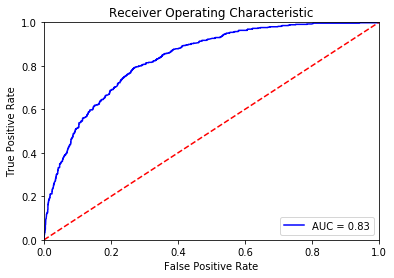

In [134]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = gbm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ---- Automate pipeline ----

Write script that trains model on entire training set, saves model to disk,and scores the "test" dataset

In [167]:
%%time
gbm.fit(X_test,y_test.values.ravel())

#test_set_without_churn=test_set.drop(columns='Churn')


AccuracyScore = accuracy_score(y_test,predict_test)

with open('model.txt', 'w') as file:
    file.write(str(gbm))
    file.write("\n")
    file.write("Accuracy=")
    file.write(str(AccuracyScore))

Wall time: 220 ms
